# Basic Optimisation using Python
Jessica Leung



In this notebook, we are going to demonstrate how to solve an optimization problem in Python with different tools available. We will be using the following packages:
- `scipy.optimize` (comes with Anaconda),
- `Gurobi` (To install, go to installation guide)
- `cvxpy` (To install, type `conda install cvx` to your terminal/anaconda prompt, or go to https://www.cvxpy.org/install/index.html)

All three packages are very powerful tools with very comprehensive documentation. Depending on the problem that you want to solve, you may find one package more user-friendly than the other.

- `Scipy.optimize` documentation: https://docs.scipy.org/doc/scipy/reference/optimize.html
- `Gurobi` documentation: https://www.gurobi.com/documentation/
- `cvxpy` documentation: https://www.cvxpy.org/tutorial/index.html

## Using `Scipy.optimize`

Let's start by finding the minimum of the scalar function $$f(x) = -0.3e^{(x-0.6)^2}$$

Here we provide initial guess as $1.0$.

In [31]:
import numpy as np
from scipy.optimize import minimize
def f(x):
    return -0.3*np.exp(-(x-0.6)**2)
result = minimize(fun = f, x0 = [1.0])
print (result.x)

[0.59999517]


The syntax `.x` here tells the package that we would like to know the current value of our variable. (No matter what our variable is, the syntax remain to be `.x`.)

We can plot the function and our minimum point to verify the result.

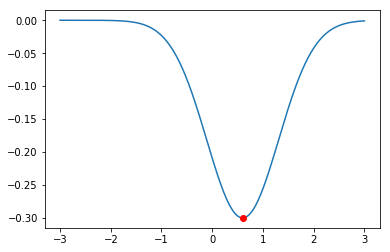

In [33]:
import matplotlib.pyplot as plt
x = np.linspace(-3,3,200)
plt.plot(x,f(x))
plt.plot(0.59999517, f(0.59999517), 'ro')
plt.show()

`scipy.optimise` can also handles multivariate functions. Depending on the function that you are trying to optimise (convex or not, smooth or not, linear or not), there is a wide variety of methods to choose from in the `scipy.optimise` package.



In [34]:
from scipy.optimize import minimize
def g(y):
    return np.sqrt((2*y[0] - 5)**2 + (6*y[1] - 3)**2)
result = minimize(fun = g, x0 = [0,0])
print (result.x)

[2.49999999 0.49999999]


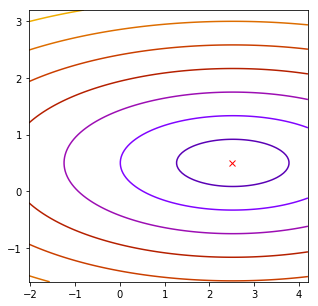

In [35]:
x, y = np.mgrid[-2.03:4.2:.04, -1.6:3.2:.04]
x = x.T
y = y.T
plt.figure(1, figsize=(5, 5))
contours = plt.contour(np.sqrt((2*x - 5)**2 + (6*y - 3)**2),
                    extent=[-2.03, 4.2, -1.6, 3.2],
                    cmap=plt.cm.gnuplot)
plt.plot(2.49999999,0.49999999, 'rx')

## Using `cvxpy`

CVXPY is a Python-embedded modeling language for convex optimization problems. It automatically transforms the problem into standard form, calls a solver, and unpacks the results.

To install, type `conda install cvxpy` to the terminal/anaconda prompt.

Let's start with a simple LP problem. Consider the following problem:

General Auto manufactures luxury cars and trucks. The company believes its target customers are high-income men and women. To reach this group, General Auto has embarked on an ambitious TV advertising campaign and will purchase 1-minute commercial spots on two types of programs: comedy shows and football games.

- Each comedy commercial is seen by 7 million high income women and 2 million high-income men and costs \$50,000.

- Each football game is seen by 2 million high-income women and 12 million high-income men and costs \$100,000.

- General Auto would like for commercials to be seen by at least 28 million high-income women and 24 million high-income men.

Use LP to determine how General Auto can meet its advertising requirements at minimum cost.

General Auto must decide how many comedy and football ads should be purchased, so the decision variables are
- $x_{comedy}$ - number of 1-minute comedy ads purchased
- $x_{football}$ - number of 1-minute football ads purchased

Then the problem can be formulated as:

$$\text{minimize}  \quad 50 x_{comedy} + 100 x_{football} $$
$$ \text{subject to}  \quad 7 x_{comedy} + 2 x_{football} \geq 28 $$
$$\quad 2 x_{comedy} + 12 x_{football} \geq 24 $$
$$\quad x_{comedy}, x_{football}\geq 0$$

In [44]:
import cvxpy as cp

# Create two scalar optimization variables.
x1 = cp.Variable()
x2 = cp.Variable()

# Create two constraints.
constraints = [7*x1 + 2*x2 >= 28,
               2*x1 + 12*x2 >= 24,
              x1 >= 0,
              x2 >= 0]

# Form objective.
obj = cp.Minimize(50*x1 + 100*x2)

# Form and solve problem.
prob = cp.Problem(obj, constraints)
prob.solve()  # Returns the optimal value.
print("status:", prob.status)
print("optimal value", prob.value)
print("optimal var", x1.value, x2.value)

status: optimal
optimal value 320.0
optimal var 3.6000000000000005 1.4


## A Simple Machine Learning Example using CVXPY

### Logistic Regression with $\ell_1$ regularisation

In this example, we train a logistic regression classifier with $\ell_1$ regularisation. Given data $x_i \in \mathbf{R}^n$ and $y_i \in \{0,1\}, i = 1,...,n$, our goal is to learn a linear classifier $\hat{y} = I[x \beta > 0]$.

We can model this relationship as follows:
$$ log \dfrac{Pr(Y = 1| X = x)}{Pr(Y = 0| X = x)} = x \beta$$

Therefore, we fit $\beta$ by maximising the log-likelihood of the data, plus a regularisation term $\lambda \|\beta\|_1$ where $\lambda > 0$:

$$ \ell(\beta) = \sum_{i = 1}^n y_i (x\beta)_i - log(1 + exp((x\beta)_i)) - \lambda \|\beta\|_1$$

This objective function is concave in $\beta$, so maximising this concave function is a convex optimisation problem. For simplification, we take $\lambda = 0.1$ in this example. In practice, you can perform cross validation to find the best value of $\lambda$.

In the following code we generate data with $p=50$ features by randomly choosing $x_i$ and supplying a sparse $\beta_{true} \in \mathbf{R}^n$.

status: optimal
optimal value -0.3489231061667745
optimal var [ 7.72881910e-01  4.52165463e-01 -2.94472768e-01 -3.45121087e-12
  8.10959783e-12  2.25227569e-12  3.98691707e-12  1.43401127e-02
  5.08455937e-11 -1.36329821e-10  4.22511774e-12  8.90807297e-12
 -2.16837167e-11  7.82449968e-11 -3.54859367e-12  1.28195462e-11
 -4.10075409e-12  1.66532091e-02  2.04175804e-12 -6.29757368e-14
 -1.01985866e-11 -3.36732664e-11 -3.40010453e-12 -4.02429238e-02
  6.13643400e-11 -2.22784055e-11 -1.46346483e-12 -5.65635676e-13
 -1.92671561e-11  1.23094858e-11 -2.46574874e-12  4.16244416e-11
  1.53792215e-11 -8.54203591e-12  8.05739746e-02  1.28275506e-11
 -2.96233234e-12  6.99195110e-12  2.55893246e-02 -3.44169794e-12
 -9.07045573e-12  5.27104626e-11 -1.19968367e-11  1.36487864e-09
  2.09062772e-12  7.19106408e-12 -7.01972501e-12 -9.08733160e-02
 -1.96099709e-11  8.47393249e-13]


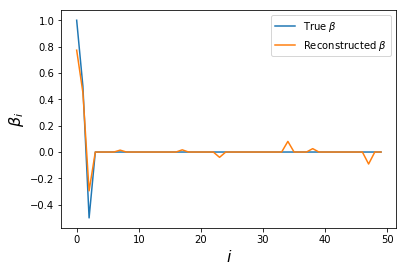

In [56]:
np.random.seed(0)
p = 50
n = 50

def sigmoid(z):
    return 1/(1 + np.exp(-z))

beta_true = np.array([1, 0.5, -0.5] + [0]*(p - 3))
X = (np.random.random((n, p)) - 0.5)*10
Y = np.round(sigmoid(X @ beta_true + np.random.randn(n)*0.5))

beta = cp.Variable(n)
lambd = 0.1
log_likelihood = cp.sum(
    cp.multiply(Y, X @ beta) - cp.logistic(X @ beta))
problem = cp.Problem(cp.Maximize(log_likelihood/p - lambd * cp.norm(beta, 1)))
problem.solve()
print("status:", problem.status)
print("optimal value", problem.value)
print("optimal var", beta.value)

plt.plot(beta_true, label=r"True $\beta$")
plt.plot(beta.value, label=r"Reconstructed $\beta$")
plt.xlabel(r"$i$", fontsize=16)
plt.ylabel(r"$\beta_i$", fontsize=16)
plt.legend(loc="upper right")

# More powerful solver
## Using `Gurobi`

Gurobi is a commerical solver that is capable of handling complex mathematical problems, including linear programming (LP), mixed-integer linear programming (MILP), quadratic programming (QP), mixed-integer quadratic programming (MIQP), Quadratically-constrained programming (QCP) and mixed-integer quadratically constrainted programming (MIQCP).

Free academic license available on https://www.gurobi.com/. Please refer to the installation guie for more details on installation and the license.

Let's solve the same problem (General Auto) with `gurobi` instead.

### Define model and input data
First, we should import the package `gurobipy`. Naming the module by abbreviation `grb` allows easy reference to the module and avoid confusion with other packages. You can also name it with any other abbreviations. 

Then we define a model `m` and name it `General Auto`.

In [36]:
import gurobipy as grb
# Define a model
m = grb.Model('General Auto')
# Input data
Comedy = {'women':7,'men':2}
Football = {'women':2,'men':12}
MinView = {'women':28,'men':24}
Cost = {'Comedy':50, 'Football':100}

### Define variables

Create an empty vector x and define the elements in the vector. 

Use the function 'addVar' to add variables into the model 'm'. As input arguments of the function, You should include the variable types 'vtype=' and the name of the variables 'name='.By default, the decision variables are non-negative. Since we are defining varibles for the Gurobi solver, 'grb.GRB.' must be reffered.

Let $x_{comedy}$ and $x_{football}$ are continuous variables which correspond to the number of one minutes comedy and football ads purchased respectively.

You can define the objective function by including the coefficients while defining the decision variables. Python will sum the product of the decision variables and the coefficient as the objective function.

In [37]:
#Define the decision variables
x={}
for k,v in Cost.items():
    x[k] = m.addVar(vtype = grb.GRB.CONTINUOUS, obj = v, name= 'x_{}'.format(k))

### Define model sense
Define the objective function using the function 'modelSense' on model 'm'. The sense of the model represents whether to maximise or to minimise the objective function. Since we are Gurobi as the solver, 'grb.GRB.' must be reffered.

We are trying to minimise the cost, thus we should minimise the objective function.



In [38]:
#Define model sense
m.modelSense = grb.GRB.MINIMIZE

**Alternatively**, the objective function can be set manually using the function 'setObjective'. Remember to include the sense of the objective (maximise or minimise) as an argument of the function. Once the function 'setObjective' is used, the coefficients that has been defined using 'addVar' will be ignored.

In [39]:
m.setObjective(50*x['Comedy']+100*x['Football'], grb.GRB.MINIMIZE)

### Add constraints
Use the function 'addConstr' to add constraints into the model 'm'. The constraints can be typed explicitly with the decision variables defined earlier. Name the constraints as reference and avoid confusion.

In [40]:
# constraints
for k,v in MinView.items():
    m.addConstr(x['Comedy']*Comedy[k]+x['Football']*Football[k]>= v, name='MinView_{}'.format(k))

### Solve the mathematical problem

Solve the problem by optimising the model `m`

In [41]:
# Solve
m.optimize()

Optimize a model with 2 rows, 2 columns and 4 nonzeros
Coefficient statistics:
  Matrix range     [2e+00, 1e+01]
  Objective range  [5e+01, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+01, 3e+01]
Presolve time: 0.01s
Presolved: 2 rows, 2 columns, 4 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   6.500000e+00   0.000000e+00      0s
       2    3.2000000e+02   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.02 seconds
Optimal objective  3.200000000e+02


### Display the solution

Here we use the syntax `.x` to obtain the current value of our variabels and `.objVal` to obtain the optimal of the model.

In [42]:
print ('----------------------------------')
for i in Cost:
    print ('{:.2f} ads on {} is purchsed.'.format(x[i].x,i))
print ('----------------------------------')
print ('Total cost: ${:.2f}'.format(m.objVal))

----------------------------------
3.60 ads on Comedy is purchsed.
1.40 ads on Football is purchsed.
----------------------------------
Total cost: $320.00


Conclusion and interpretation: Total cost is \$320 with 1.4 1-min football ads and 3.6 1-min Comedy ads purchased respectively.

#### Hard Code in Gurobi

Alternatively, you can also hard code your mathematical problem in Gurobi. It may be simpler and faster for some problem but not necessarily scalable. Again, it all depends on your problem/application.

In [43]:
d = grb.Model('General Auto2')
x1 = d.addVar(vtype = grb.GRB.CONTINUOUS, obj = 50)
x2 = d.addVar(vtype = grb.GRB.CONTINUOUS, obj = 100)
d.modelSense = grb.GRB.MINIMIZE
d.addConstr(7*x1 + 2*x2 >= 28)
d.addConstr(2*x1 + 12*x2 >= 24)
d.optimize()
print ('----------------------------------')
print ('{:.2f} ads on Comedy is purhcased.'.format(x1.x))
print ('{:.2f} ads on Football is purhcased.'.format(x2.x))
print ('----------------------------------')
print ('Total cost: ${:.2f}'.format(m.objVal))

Optimize a model with 2 rows, 2 columns and 4 nonzeros
Coefficient statistics:
  Matrix range     [2e+00, 1e+01]
  Objective range  [5e+01, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+01, 3e+01]
Presolve time: 0.02s
Presolved: 2 rows, 2 columns, 4 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   6.500000e+00   0.000000e+00      0s
       2    3.2000000e+02   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.03 seconds
Optimal objective  3.200000000e+02
----------------------------------
3.60 ads on Comedy is purhcased.
1.40 ads on Football is purhcased.
----------------------------------
Total cost: $320.00
